   Unnamed: 0  Green    Red   Blue  Yellow  Orange  Pink  Violet  Cyan  \
0         NaN  24500  49000  23500   24500   24300  2100    3100  4100   
1         NaN   8000      0   1212       0    2154  1300    2300  3300   
2         NaN  24400  48800  23400   24400   24200  1900    2900  3900   
3         NaN    320   4520   1212    2552    7865  1600    2600  3600   
4         NaN  24000  47800  23000   24000   23800  2000    3000  4000   

   Combination BACKGROUND  
0        49281      Light  
1        15342       Dark  
2        49182      Light  
3        13245      Light  
4        48580      Light  


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 0']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 714, number of used features: 9
[LightGBM] [Info] Start training from score -1.292768
[LightGBM] [Info] Start training from score -6.570883
[LightGBM] [Info] Start training from score -0.322840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

ValueError: pos_label=1 is not a valid label. It should be one of [0, 2]

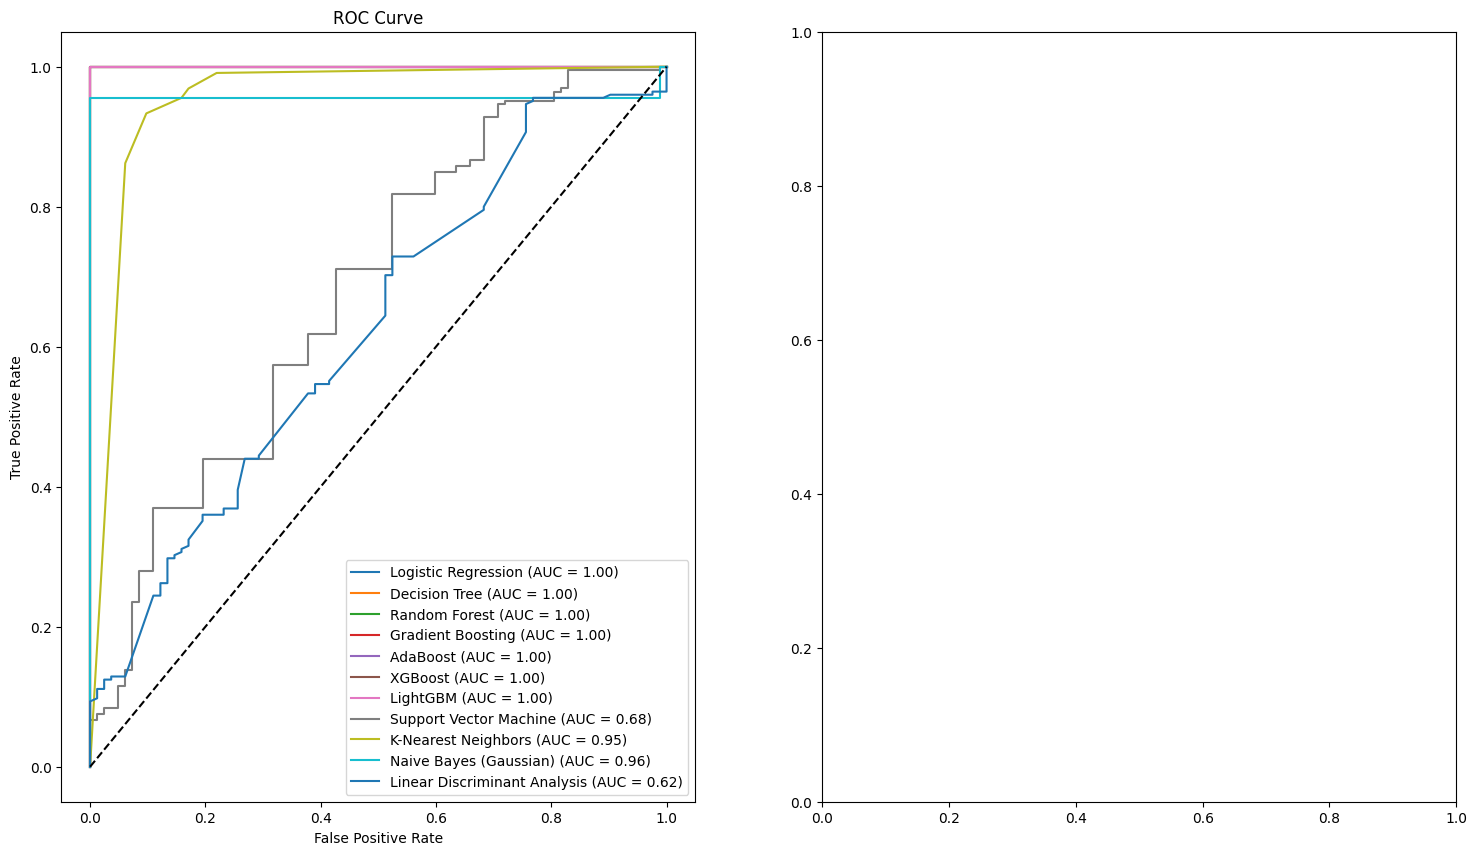

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import (roc_curve, roc_auc_score, auc, accuracy_score, precision_score,
                             recall_score, f1_score, mean_squared_error)

# Import additional libraries for XGBoost and LightGBM
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load your dataset
# Replace 'your_dataset.excel' with the path to your excel file
data = pd.read_excel('/content/COLOR COMBINATION DATASET_FEATURE SELECTION OUTCOMES.xlsx')

# Display the first few rows of the dataset
print(data.head())

# Assuming the target column is named 'target' and the rest are features
# Replace 'target' with the name of your target column
X = data.drop(columns=['Combination'])
y = data['BACKGROUND']

# Create a LabelEncoder object
le = LabelEncoder()

# Convert string values in 'X' to numerical using LabelEncoder
for column in X.columns:
    if X[column].dtype == type(object):  # Check if the column has string values
        X[column] = le.fit_transform(X[column])

# Create a SimpleImputer object to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X = imputer.fit_transform(X)

# Fit the encoder to your target variable and transform it
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes (Gaussian)': GaussianNB(),
    # Remove QDA for now to avoid the error
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Prepare for plotting
plt.figure(figsize=(18, 10))

# ROC Curve
plt.subplot(1, 2, 1)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)

    # Assuming '2' is the positive label
    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 2], pos_label=2)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')



plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Error and Performance Metrics
plt.subplot(1, 2, 2)
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
model_names = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    model_names.append(name)

    # Plot Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    plt.bar(name, mse, label=f'{name} (Accuracy = {accuracy:.2f})')

plt.ylabel('Mean Squared Error')
plt.title('Error Plot')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Display detailed metrics
for metric_name, values in metrics.items():
    print(f"\n{metric_name}:")
    for name, value in zip(model_names, values):
        print(f"{name}: {value:.2f}")




In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/COLOR COMBINATION DATASET_FEATURE SELECTION OUTCOMES.xlsx')

# Display the first few rows of the dataset
print(data.head())

   Unnamed: 0  Green    Red   Blue  Yellow  Orange  Pink  Violet  Cyan  \
0         NaN  24500  49000  23500   24500   24300  2100    3100  4100   
1         NaN   8000      0   1212       0    2154  1300    2300  3300   
2         NaN  24400  48800  23400   24400   24200  1900    2900  3900   
3         NaN    320   4520   1212    2552    7865  1600    2600  3600   
4         NaN  24000  47800  23000   24000   23800  2000    3000  4000   

   Combination BACKGROUND  
0        49281      Light  
1        15342       Dark  
2        49182      Light  
3        13245      Light  
4        48580      Light  


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Unnamed: 0']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:46:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 714, number of used features: 9
[LightGBM] [Info] Start training from score -1.292768
[LightGBM] [Info] Start training from score -6.570883
[LightGBM] [Info] Start training from score -0.322840
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

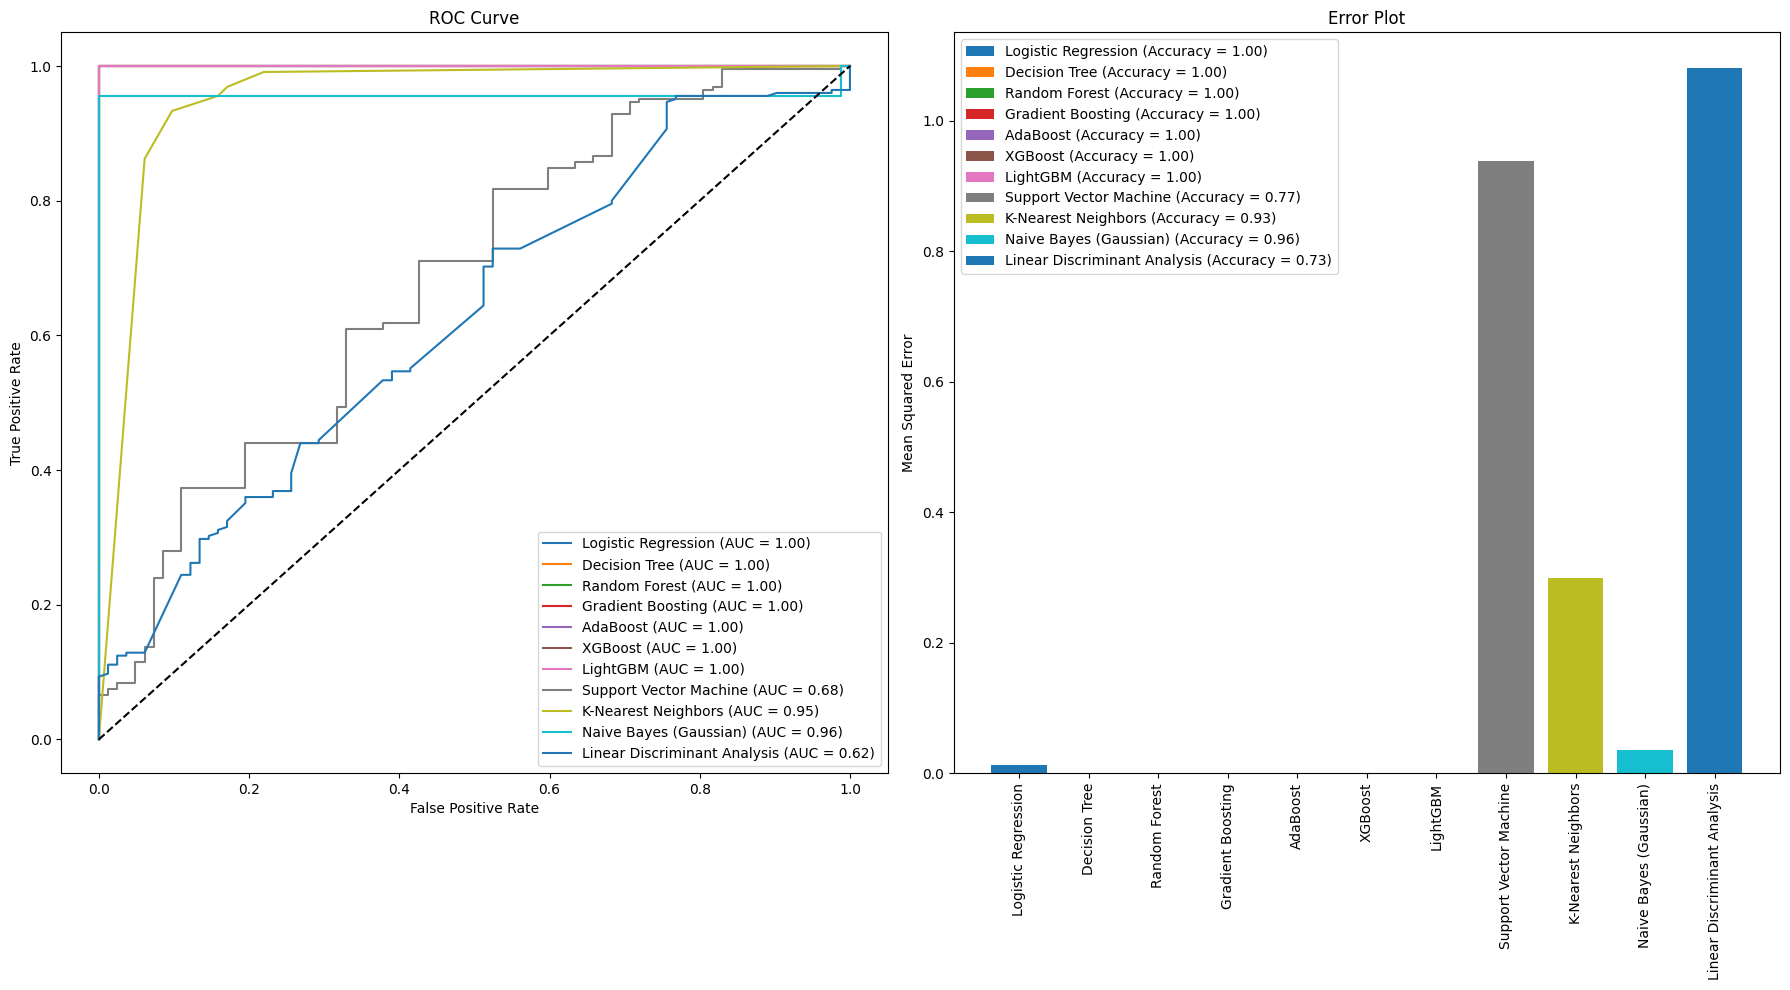


Accuracy:
Logistic Regression: 1.00
Decision Tree: 1.00
Random Forest: 1.00
Gradient Boosting: 1.00
AdaBoost: 1.00
XGBoost: 1.00
LightGBM: 1.00
Support Vector Machine: 0.77
K-Nearest Neighbors: 0.93
Naive Bayes (Gaussian): 0.96
Linear Discriminant Analysis: 0.73

Precision:
Logistic Regression: nan
Decision Tree: nan
Random Forest: nan
Gradient Boosting: nan
AdaBoost: nan
XGBoost: nan
LightGBM: nan
Support Vector Machine: nan
K-Nearest Neighbors: nan
Naive Bayes (Gaussian): nan
Linear Discriminant Analysis: nan

Recall:
Logistic Regression: nan
Decision Tree: nan
Random Forest: nan
Gradient Boosting: nan
AdaBoost: nan
XGBoost: nan
LightGBM: nan
Support Vector Machine: nan
K-Nearest Neighbors: nan
Naive Bayes (Gaussian): nan
Linear Discriminant Analysis: nan

F1 Score:
Logistic Regression: nan
Decision Tree: nan
Random Forest: nan
Gradient Boosting: nan
AdaBoost: nan
XGBoost: nan
LightGBM: nan
Support Vector Machine: nan
K-Nearest Neighbors: nan
Naive Bayes (Gaussian): nan
Linear Discr

In [ ]:
# 02
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.metrics import (roc_curve, roc_auc_score, auc, accuracy_score, precision_score,
                             recall_score, f1_score, mean_squared_error)

# Import additional libraries for XGBoost and LightGBM
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load your dataset
# Replace 'your_dataset.excel' with the path to your excel file
data = pd.read_excel('/content/COLOR COMBINATION DATASET_FEATURE SELECTION OUTCOMES.xlsx')

# Display the first few rows of the dataset
print(data.head())

# Assuming the target column is named 'target' and the rest are features
# Replace 'target' with the name of your target column
X = data.drop(columns=['Combination'])
y = data['BACKGROUND']

# Create a LabelEncoder object
le = LabelEncoder()

# Convert string values in 'X' to numerical using LabelEncoder
for column in X.columns:
    if X[column].dtype == type(object):  # Check if the column has string values
        X[column] = le.fit_transform(X[column])

# Create a SimpleImputer object to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data and transform it
X = imputer.fit_transform(X)

# Fit the encoder to your target variable and transform it
y = le.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': lgb.LGBMClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes (Gaussian)': GaussianNB(),
    # Remove QDA for now to avoid the error
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Prepare for plotting
plt.figure(figsize=(18, 10))




# ROC Curve
plt.subplot(1, 2, 1)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)

    # Check the unique values in y_test
    unique_labels = np.unique(y_test)

    # Determine the positive label based on available classes
    if len(unique_labels) == 2:
        pos_label = unique_labels[1]
    else:
        # Handle cases with more than two classes - choose a suitable positive label
        pos_label = unique_labels[-1] # Example: Choose the last class as positive

    fpr, tpr, _ = roc_curve(y_test, y_prob[:, pos_label], pos_label=pos_label)

    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')


# Error and Performance Metrics
plt.subplot(1, 2, 2)
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
model_names = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)


      # Check if 1 exists in y_test
    if 1 in le.classes_:
        precision = precision_score(y_test, y_pred, pos_label=le.transform([1])[0])
        recall = recall_score(y_test, y_pred, pos_label=le.transform([1])[0])
        f1 = f1_score(y_test, y_pred, pos_label=le.transform([1])[0])
    else:
        # Handle the case where 1 is not in y_test
        precision = np.nan  # Or any other suitable value/handling
        recall = np.nan
        f1 = np.nan

    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    model_names.append(name)

    # Plot Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    plt.bar(name, mse, label=f'{name} (Accuracy = {accuracy:.2f})')

plt.ylabel('Mean Squared Error')
plt.title('Error Plot')
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

# Display detailed metrics
for metric_name, values in metrics.items():
    print(f"\n{metric_name}:")
    for name, value in zip(model_names, values):
        print(f"{name}: {value:.2f}")
